In [1]:
#@title
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#@title
def rename_unnamed(df, label=""):
    for i, columns in enumerate(df.columns.levels):
        columns = columns.tolist()
        for j, row in enumerate(columns):
            if "Unnamed: " in row:
                columns[j] = ""
        df.columns.set_levels(columns, level=i, inplace=True, verify_integrity=False)
    return df

In [3]:
#@title
def clean(path):
    data = pd.read_csv(path, sep=', ', names=['timestamp', 'Leg1, t', 'Leg2, t', 'Conv'])
    data = data.replace('ï»¿"', '', regex=True)
    data = data.replace('"', '', regex=True)
    data['Conv'] = data['Conv'].astype('float')
    print(data.isnull().sum())
    return data

# Analysis

In [4]:
#@title
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

s1 = pd.read_csv('/content/SAGES1_clean.csv')
s2 = pd.read_csv('/content/SAGES2_clean.csv')
s3 = pd.read_csv('/content/SAGES3_clean.csv')
s4 = pd.read_csv('/content/SAGES4_clean.csv')

## Descriptive

In [26]:
#@title
print('Desctiption of SAGES-1')
s1.describe()

Desctiption of SAGES-1


,"Leg1, t","Leg2, t",Conv
count,227586.000000,227586.000000,227586.000000
mean,34.944397,43.011542,168.755162
std,54.685117,53.279488,232.701921
min,-78.400000,-78.500000,-300.000000
25%,41.700000,46.050000,197.100000
50%,52.720000,60.930000,254.000000
75%,65.370000,74.260000,283.600000
max,112.910000,107.500000,670.300000


In [27]:
#@title
print('Desctiption of SAGES-2')
s2.describe()

Desctiption of SAGES-2


,"Leg1, t","Leg2, t",Conv
count,195985.000000,195985.000000,195985.000000
mean,38.770856,36.043663,212.564459
std,50.293330,49.651675,228.818461
min,-78.440000,-78.540000,-300.000000
25%,42.590000,36.980000,214.100000
50%,51.680000,49.360000,270.300000
75%,65.700000,63.670000,313.500000
max,112.680000,102.140000,729.000000


In [28]:
#@title
print('Desctiption of SAGES-3')
s3.describe()

Desctiption of SAGES-3


,"Leg1, t","Leg2, t",Conv
count,137984.000000,137984.000000,137984.000000
mean,58.806535,65.971701,295.563439
std,19.620033,20.832644,89.350655
min,-79.900000,-79.900000,-299.600000
25%,45.640000,51.850000,240.400000
50%,59.230000,64.450000,268.800000
75%,70.560000,80.010000,332.000000
max,109.160000,111.910000,691.000000


In [29]:
#@title
print('Desctiption of SAGES-4')
s4.describe()

Desctiption of SAGES-4


,"Leg1, t","Leg2, t",Conv
count,137981.000000,137981.000000,137981.000000
mean,47.493108,58.041619,240.787927
std,36.257794,37.997616,174.855579
min,-79.900000,-80.000000,-250.000000
25%,42.490000,46.920000,247.800000
50%,51.650000,61.200000,264.200000
75%,61.010000,73.310000,318.300000
max,323.220000,323.220000,1010.000000


## Distribution

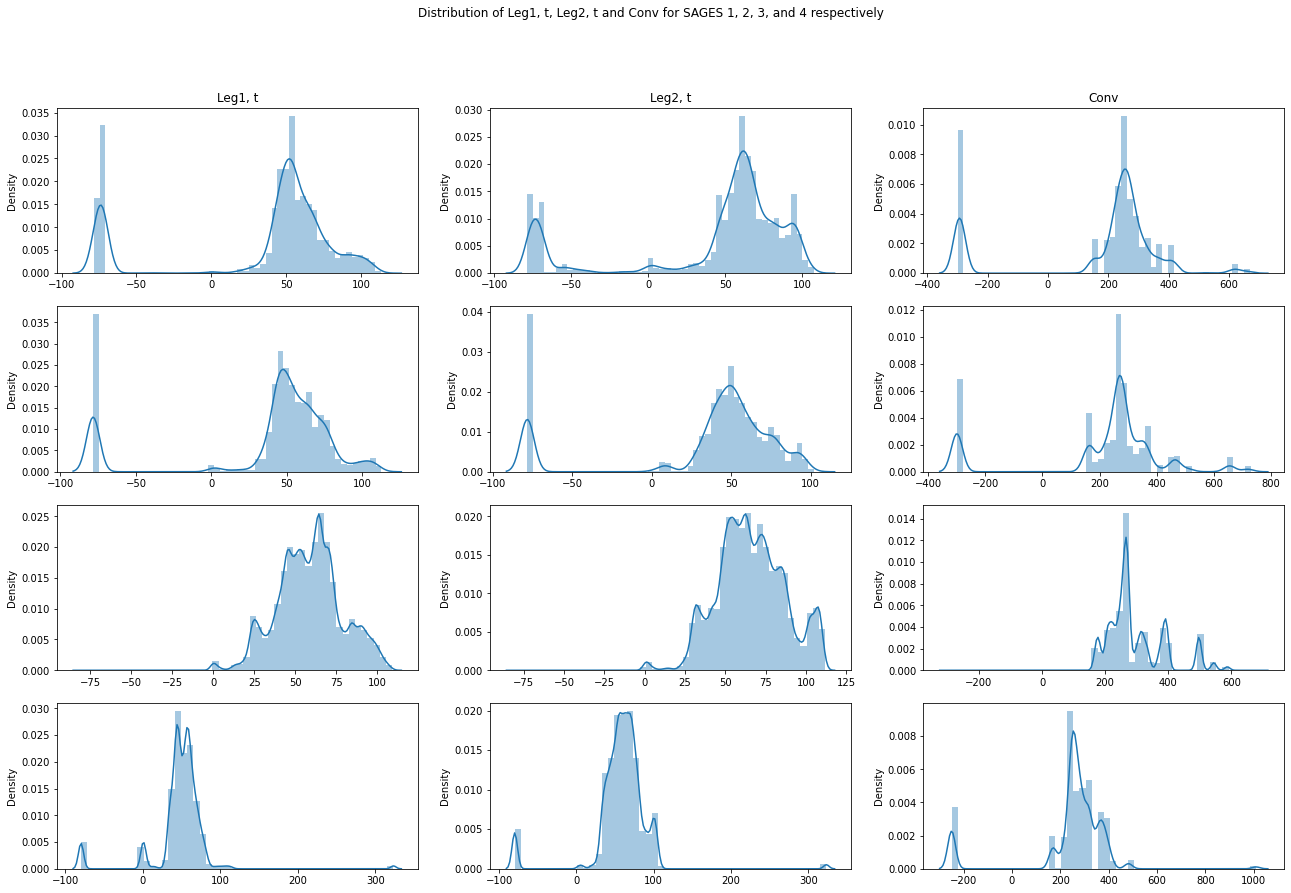

In [15]:
#@title
fig, axes = plt.subplots(4, 3, figsize=(22, 14))
fig.suptitle('Distribution of Leg1, t, Leg2, t and Conv for SAGES 1, 2, 3, and 4 respectively')

sns.distplot(s1[['Leg1, t']], ax=axes[0, 0])
axes[0, 0].set_title('Leg1, t')
axes[0, 1].set_title('Leg2, t')
axes[0, 2].set_title('Conv')
sns.distplot(s1[['Leg2, t']], ax=axes[0, 1])
sns.distplot(s1[['Conv']], ax=axes[0, 2])
sns.distplot(s2[['Leg1, t']], ax=axes[1, 0])
sns.distplot(s2[['Leg2, t']], ax=axes[1, 1])
sns.distplot(s2[['Conv']], ax=axes[1, 2])
sns.distplot(s3[['Leg1, t']], ax=axes[2, 0])
sns.distplot(s3[['Leg2, t']], ax=axes[2, 1])
sns.distplot(s3[['Conv']], ax=axes[2, 2])
sns.distplot(s4[['Leg1, t']], ax=axes[3, 0])
sns.distplot(s4[['Leg2, t']], ax=axes[3, 1])
sns.distplot(s4[['Conv']], ax=axes[3, 2])


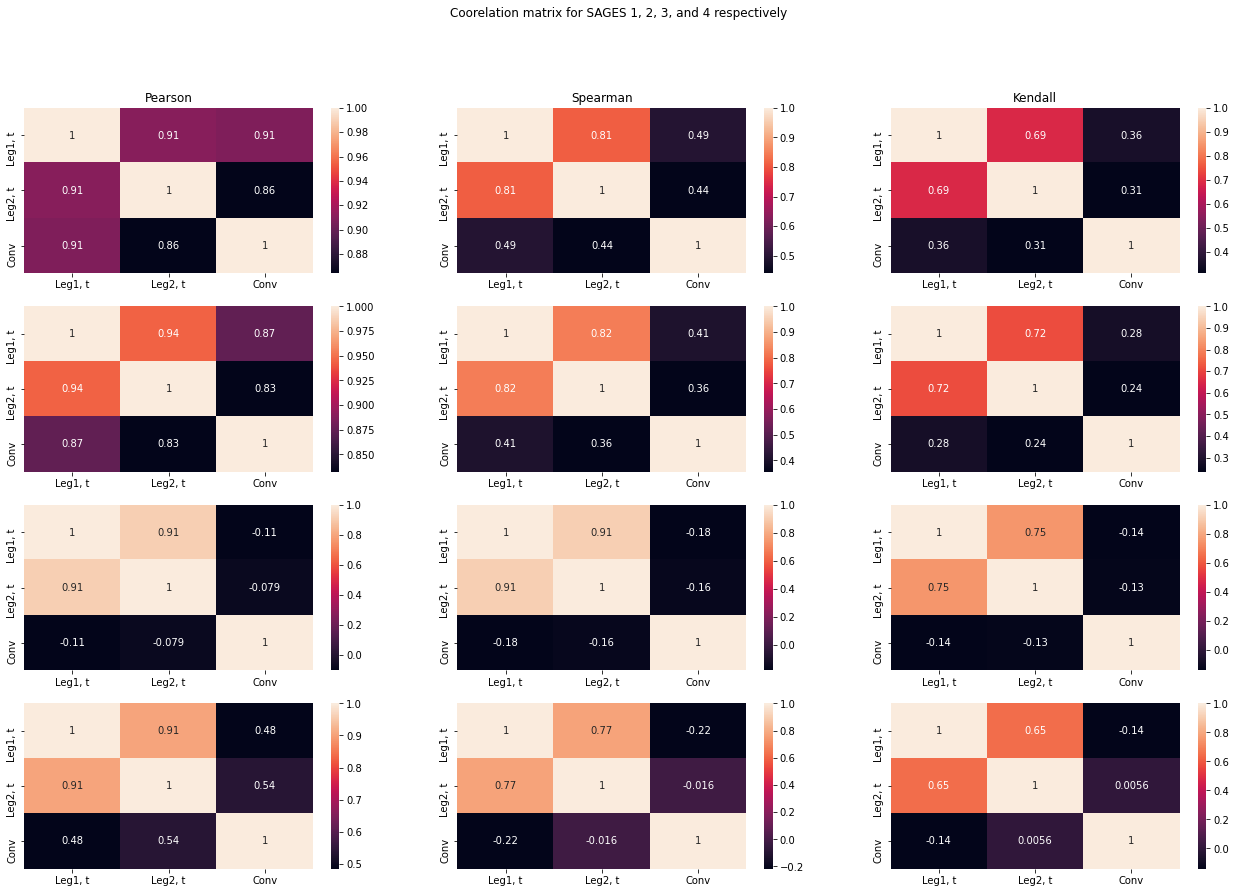

In [17]:
#@title
fig, axes = plt.subplots(4, 3, figsize=(22, 14))
fig.suptitle('Coorelation matrix for SAGES 1, 2, 3, and 4 respectively')

axes[0, 0].set_title('Pearson')
axes[0, 1].set_title('Spearman')
axes[0, 2].set_title('Kendall')
sns.heatmap(s1.corr(), annot=True, ax=axes[0, 0])
sns.heatmap(s1.corr(method='spearman'), annot=True, ax=axes[0, 1])
sns.heatmap(s1.corr(method='kendall'), annot=True, ax=axes[0, 2])
sns.heatmap(s2.corr(), annot=True, ax=axes[1, 0])
sns.heatmap(s2.corr(method='spearman'), annot=True, ax=axes[1, 1])
sns.heatmap(s2.corr(method='kendall'), annot=True, ax=axes[1, 2])
sns.heatmap(s3.corr(), annot=True, ax=axes[2, 0])
sns.heatmap(s3.corr(method='spearman'), annot=True, ax=axes[2, 1])
sns.heatmap(s3.corr(method='kendall'), annot=True, ax=axes[2, 2])
sns.heatmap(s4.corr(), annot=True, ax=axes[3, 0])
sns.heatmap(s4.corr(method='spearman'), annot=True, ax=axes[3, 1])
sns.heatmap(s4.corr(method='kendall'), annot=True, ax=axes[3, 2])

In [5]:
#@title
s1['timestamp'] = pd.to_datetime(s1['timestamp'])
s2['timestamp'] = pd.to_datetime(s2['timestamp'])
s3['timestamp'] = pd.to_datetime(s3['timestamp'])
s4['timestamp'] = pd.to_datetime(s4['timestamp'])

In [6]:
#@title
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy.random import normal
from numpy import hstack

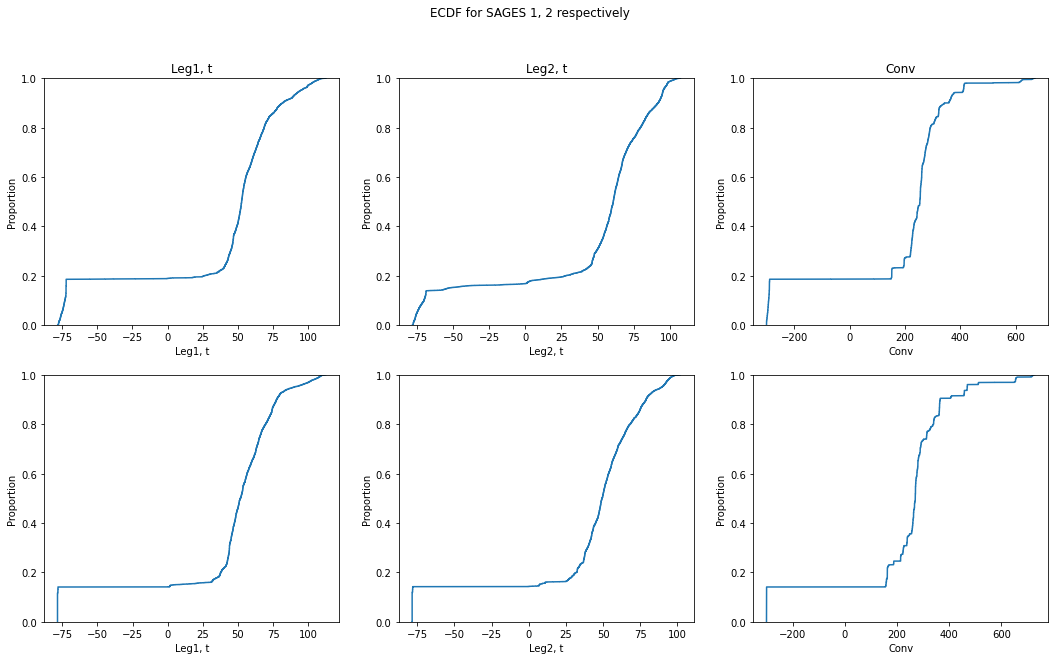

In [22]:
#@title
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('ECDF for SAGES 1, 2 respectively')

axes[0, 0].set_title('Leg1, t')
axes[0, 1].set_title('Leg2, t')
axes[0, 2].set_title('Conv')

for j, sage in enumerate([s1, s2]):
  for i in range(1, 4):
    sns.ecdfplot(data=sage, x=sage.iloc[:, i], ax=axes[j, i-1])

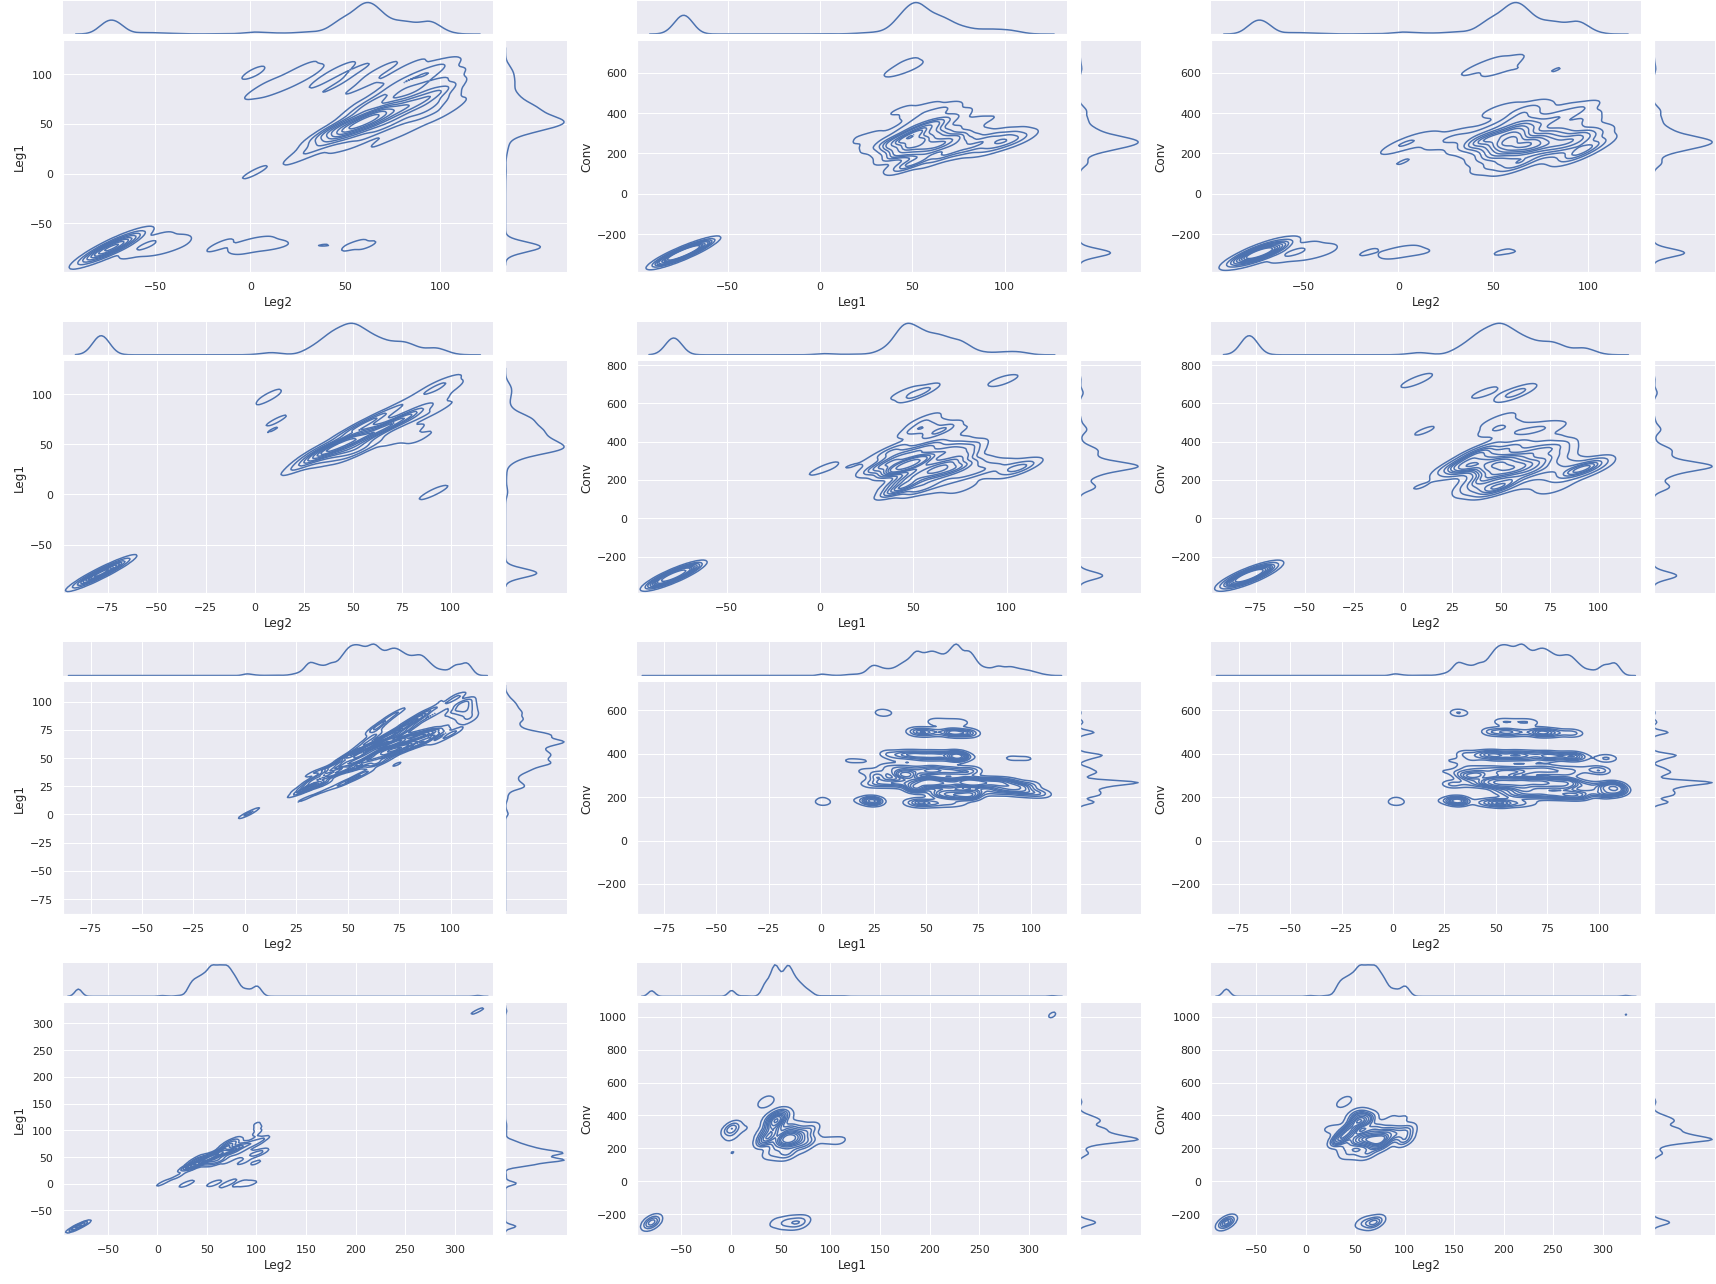

In [18]:
#@title
import matplotlib.gridspec as gridspec
sns.set()
from tqdm import tqdm

class SeabornFig2Grid():

  def __init__(self, seaborngrid, fig,  subplot_spec):
    self.fig = fig
    self.sg = seaborngrid
    self.subplot = subplot_spec
    if isinstance(self.sg, sns.axisgrid.FacetGrid) or isinstance(self.sg, sns.axisgrid.PairGrid):
      self._movegrid()
    elif isinstance(self.sg, sns.axisgrid.JointGrid):
      self._movejointgrid()
    self._finalize()

  def _movegrid(self):
    """ Move PairGrid or Facetgrid """
    self._resize()
    n = self.sg.axes.shape[0]
    m = self.sg.axes.shape[1]
    self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
    for i in range(n):
      for j in range(m):
        self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

  def _movejointgrid(self):
    """ Move Jointgrid """
    h= self.sg.ax_joint.get_position().height
    h2= self.sg.ax_marg_x.get_position().height
    r = int(np.round(h/h2))
    self._resize()
    self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

    self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
    self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
    self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

  def _moveaxes(self, ax, gs):
    ax.remove()
    ax.figure=self.fig
    self.fig.axes.append(ax)
    self.fig.add_axes(ax)
    ax._subplotspec = gs
    ax.set_position(gs.get_position(self.fig))
    ax.set_subplotspec(gs)

  def _finalize(self):
    plt.close(self.sg.fig)
    self.fig.canvas.mpl_connect("resize_event", self._resize)
    self.fig.canvas.draw()

  def _resize(self, evt=None):
    self.sg.fig.set_size_inches(self.fig.get_size_inches())


fig = plt.figure(figsize=(24, 18))
gs = gridspec.GridSpec(4, 3)
count = 0
for sage in [s1, s2, s3, s4]:
  mg0 = SeabornFig2Grid(sns.jointplot(x="Leg2", y="Leg1", data=sage, kind='kde'), fig, gs[count])
  count += 1
  mg1 = SeabornFig2Grid(sns.jointplot(x="Leg1", y="Conv", data=sage, kind='kde'), fig, gs[count])
  count += 1
  mg2 = SeabornFig2Grid(sns.jointplot(x="Leg2", y="Conv", data=sage, kind='kde'), fig, gs[count])
  count += 1

gs.tight_layout(fig)
#gs.update(top=0.7)
plt.show()

## Regression analysis

In [10]:
#@title
def lr_stats_multi(dataframe):
    dataframe.rename(columns={'Leg1, t':'Leg1', 'Leg2, t':'Leg2'}, inplace=True)
    model = sm.OLS.from_formula("Conv ~ Leg1 + Leg2", data=dataframe)
    result = model.fit()
    print('Dependency of Conv on Leg1 and Leg2\n', result.summary())
    print('\nThe regresion equaltion is - ', str(result.params[1])+'x1' + ' + ' + str(result.params[2])+'x2' + ' + ' + str(result.params[0]), '\n\n')
    model = sm.OLS.from_formula("Leg1 ~ Conv + Leg2", data=dataframe)
    result = model.fit()
    print('\nDependency of Leg1 on Conv and Leg2\n', result.summary())
    print('\nThe regresion equaltion is - ', str(result.params[1])+'x1' + ' + ' + str(result.params[2])+'x2' + ' + ' + str(result.params[0]), '\n\n')
    model = sm.OLS.from_formula("Leg2 ~ Conv + Leg1", data=dataframe)
    result = model.fit()
    print('\nDependency of Leg2 on Conv and Leg1\n', result.summary())
    print('\nThe regresion equaltion is - ', str(result.params[1])+'x1' + ' + ' + str(result.params[2])+'x2' + ' + ' + str(result.params[0]), '\n\n')

In [11]:
#@title
import statsmodels.api as sm

def ols(dataframe):
    dataframe.rename(columns={'Leg1, t':'Leg1', 'Leg2, t':'Leg2'}, inplace=True)
    model = sm.OLS.from_formula("Leg2 ~ Leg1", data=dataframe)
    result1 = model.fit()
    print('OLS for Leg 2 and Leg 1 \n', result1.summary())
    print('\nThe regresion equaltion is - ', str(result1.params[1])+'x' + ' + ' + str(result1.params[0]), '\n\n')
    model = sm.OLS.from_formula("Conv ~ Leg1", data=dataframe)
    result2 = model.fit()
    print('\nOLS for Conv and Leg 1 \n', result2.summary())
    print('\nThe regresion equaltion is - ', str(result2.params[1])+'x' + ' + ' + str(result2.params[0]), '\n\n')
    model = sm.OLS.from_formula("Conv ~ Leg2", data=dataframe)
    result3 = model.fit()
    print('\nOLS for Conv and Leg 2 \n', result3.summary())
    print('\nThe regresion equaltion is - ', str(result3.params[1])+'x' + ' + ' + str(result3.params[0]), '\n\n')
    return result1, result2, result3

### Ordinary Least Squares

#### SAGES-1

In [12]:
#@title
result1, result2, result3 = ols(s1)

OLS for Leg 2 and Leg 1 
                             OLS Regression Results                            
Dep. Variable:                   Leg2   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 1.107e+06
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:52:02   Log-Likelihood:            -1.0264e+06
No. Observations:              227586   AIC:                         2.053e+06
Df Residuals:                  227584   BIC:                         2.053e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0043     

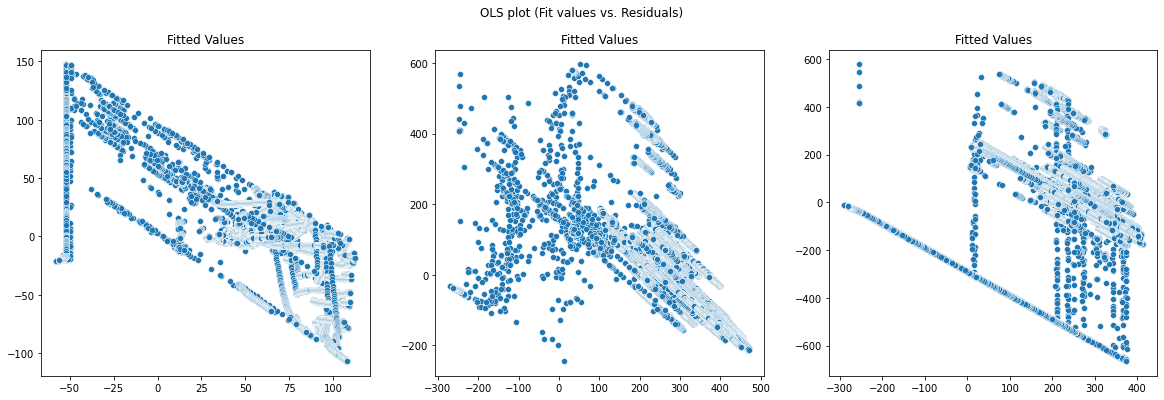

In [26]:
#@title
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('OLS plot (Fit values vs. Residuals)')
axes[0].set_title('Fitted Values')
axes[1].set_title('Fitted Values')
axes[2].set_title('Fitted Values')
sns.scatterplot(result1.fittedvalues, result1.resid, ax=axes[0])
sns.scatterplot(result2.fittedvalues, result2.resid, ax=axes[1])
sns.scatterplot(result3.fittedvalues, result3.resid, ax=axes[2])

In [32]:
#@title
lr_stats_multi(s1)

Dependency of Conv on Leg1 and Leg2
                             OLS Regression Results                            
Dep. Variable:                   Conv   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 5.647e+05
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:46:58   Log-Likelihood:            -1.3600e+06
No. Observations:              227586   AIC:                         2.720e+06
Df Residuals:                  227583   BIC:                         2.720e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2

#### SAGES-2

In [10]:
#@title
result1, result2, result3 = ols(s2)

OLS for Leg 2 and Leg 1 
                             OLS Regression Results                            
Dep. Variable:                   Leg2   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.113e+06
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:48:26   Log-Likelihood:            -6.5171e+05
No. Observations:              161686   AIC:                         1.303e+06
Df Residuals:                  161684   BIC:                         1.303e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0855     

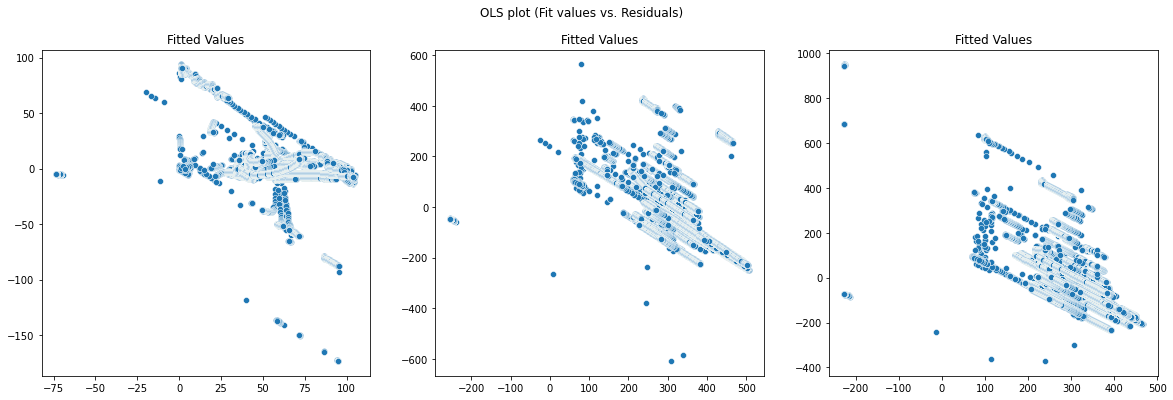

In [34]:
#@title
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('OLS plot (Fit values vs. Residuals)')
axes[0].set_title('Fitted Values')
axes[1].set_title('Fitted Values')
axes[2].set_title('Fitted Values')
sns.scatterplot(result1.fittedvalues, result1.resid, ax=axes[0])
sns.scatterplot(result2.fittedvalues, result2.resid, ax=axes[1])
sns.scatterplot(result3.fittedvalues, result3.resid, ax=axes[2])

In [13]:
#@title
lr_stats_multi(s2)

Dependency of Conv on Leg1 and Leg2
                             OLS Regression Results                            
Dep. Variable:                   Conv   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 3.184e+05
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:52:24   Log-Likelihood:            -1.2011e+06
No. Observations:              195985   AIC:                         2.402e+06
Df Residuals:                  195982   BIC:                         2.402e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     5

#### SAGES-3

In [14]:
#@title
result1, result2, result3 = ols(s3)

OLS for Leg 2 and Leg 1 
                             OLS Regression Results                            
Dep. Variable:                   Leg2   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 7.030e+05
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:56:46   Log-Likelihood:            -4.9008e+05
No. Observations:              137984   AIC:                         9.802e+05
Df Residuals:                  137982   BIC:                         9.802e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8825     

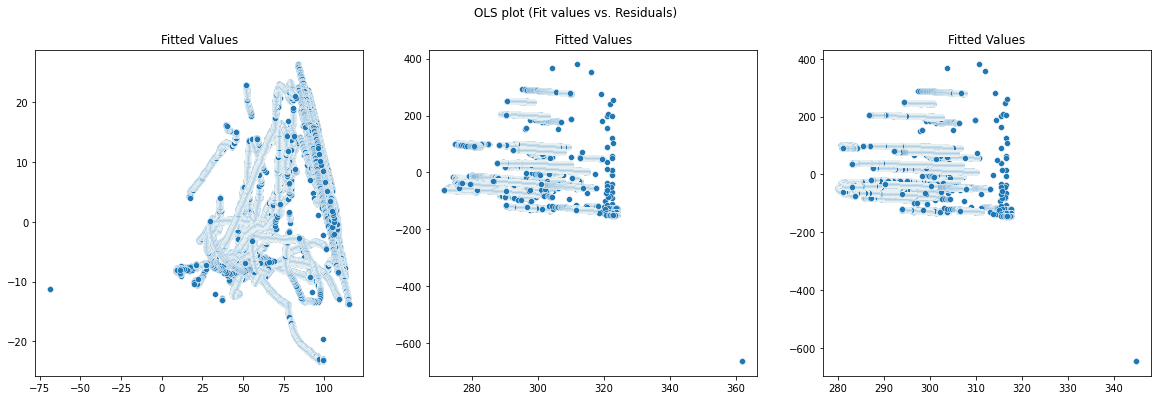

In [37]:
#@title

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('OLS plot (Fit values vs. Residuals)')
axes[0].set_title('Fitted Values')
axes[1].set_title('Fitted Values')
axes[2].set_title('Fitted Values')
sns.scatterplot(result1.fittedvalues, result1.resid, ax=axes[0])
sns.scatterplot(result2.fittedvalues, result2.resid, ax=axes[1])
sns.scatterplot(result3.fittedvalues, result3.resid, ax=axes[2])

In [38]:
#@title
lr_stats_multi(s3)

Dependency of Conv on Leg1 and Leg2
                             OLS Regression Results                            
Dep. Variable:                   Conv   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     900.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:50:16   Log-Likelihood:            -8.1480e+05
No. Observations:              137984   AIC:                         1.630e+06
Df Residuals:                  137981   BIC:                         1.630e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    31

#### SAGES-4

In [15]:
#@title
result1, result2, result3 = ols(s4)

OLS for Leg 2 and Leg 1 
                             OLS Regression Results                            
Dep. Variable:                   Leg2   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 6.400e+05
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:56:55   Log-Likelihood:            -5.7837e+05
No. Observations:              137981   AIC:                         1.157e+06
Df Residuals:                  137979   BIC:                         1.157e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8985     

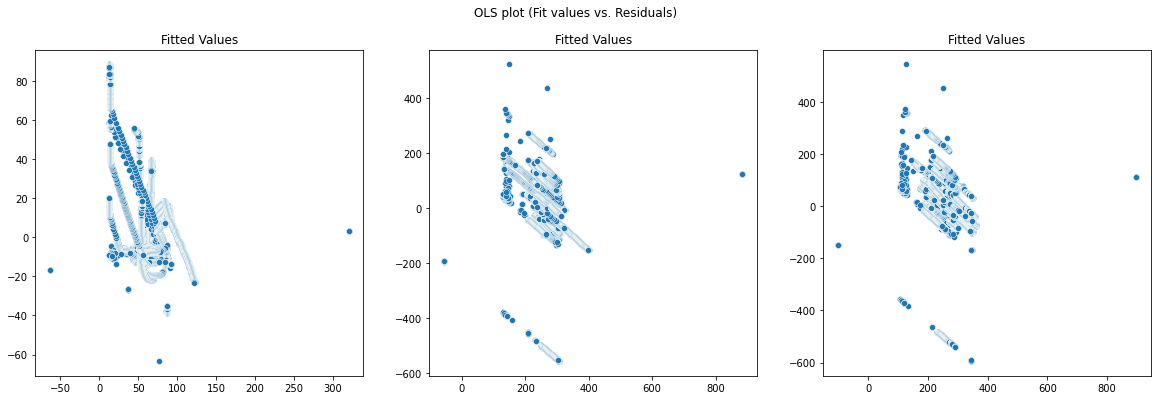

In [50]:
#@title
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('OLS plot (Fit values vs. Residuals)')
axes[0].set_title('Fitted Values')
axes[1].set_title('Fitted Values')
axes[2].set_title('Fitted Values')
sns.scatterplot(result1.fittedvalues, result1.resid, ax=axes[0])
sns.scatterplot(result2.fittedvalues, result2.resid, ax=axes[1])
sns.scatterplot(result3.fittedvalues, result3.resid, ax=axes[2])

In [51]:
#@title
lr_stats_multi(s4)

Dependency of Conv on Leg1 and Leg2
                             OLS Regression Results                            
Dep. Variable:                   Conv   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                 2.820e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:10:54   Log-Likelihood:            -8.8467e+05
No. Observations:              137981   AIC:                         1.769e+06
Df Residuals:                  137978   BIC:                         1.769e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     9

### Generalized Linear Models

In [10]:
#@title
from statsmodels.graphics.regressionplots import add_lowess

def glm(dataframe):
  model = sm.GLM.from_formula("Leg2 ~ Leg1", data=dataframe)
  result1 = model.fit()
  model = sm.GLM.from_formula("Conv ~ Leg1", data=dataframe)
  result2 = model.fit()
  model = sm.GLM.from_formula("Conv ~ Leg2", data=dataframe)
  result3 = model.fit()
  return result1, result2, result3

In [22]:
#@title
res_s11, res_s12, res_s13 = glm(s1)
res_s21, res_s22, res_s23 = glm(s2)
res_s31, res_s32, res_s33 = glm(s3) 
res_s41, res_s42, res_s43 = glm(s4)

In [23]:
#@title
def glm_plot(res1, res2, res3):
    fig = plt.figure(figsize=(21, 4))
    ax1=fig.add_subplot(1, 3, 1)
    res1.plot_added_variable("Leg1", ax=ax1)
    _ = add_lowess(ax1)
    ax2=fig.add_subplot(1, 3, 2)
    res2.plot_added_variable("Leg1", ax=ax2)
    _ = add_lowess(ax2)
    ax3=fig.add_subplot(1, 3, 3)
    res3.plot_added_variable("Leg2", ax=ax3)
    _ = add_lowess(ax3)
    plt.show()

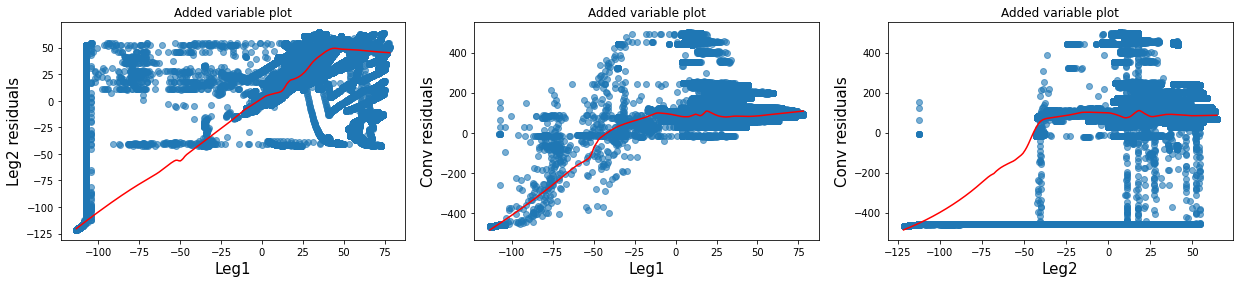

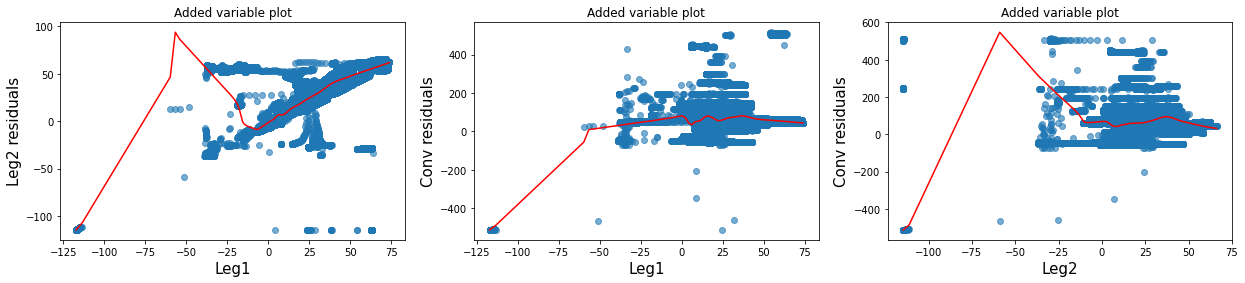

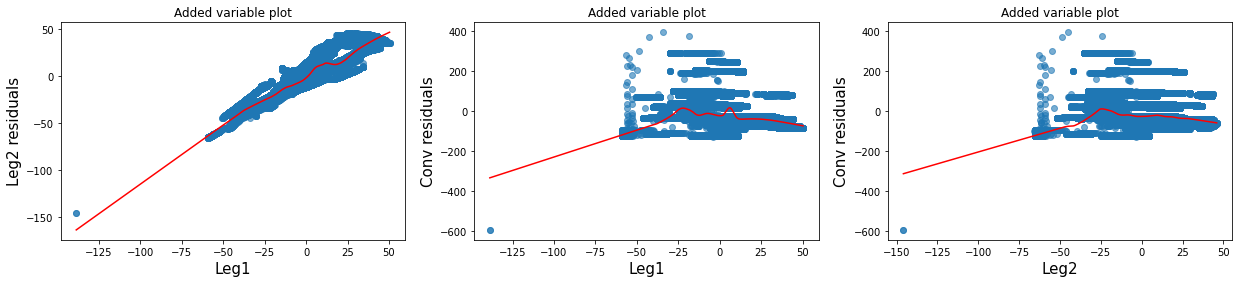

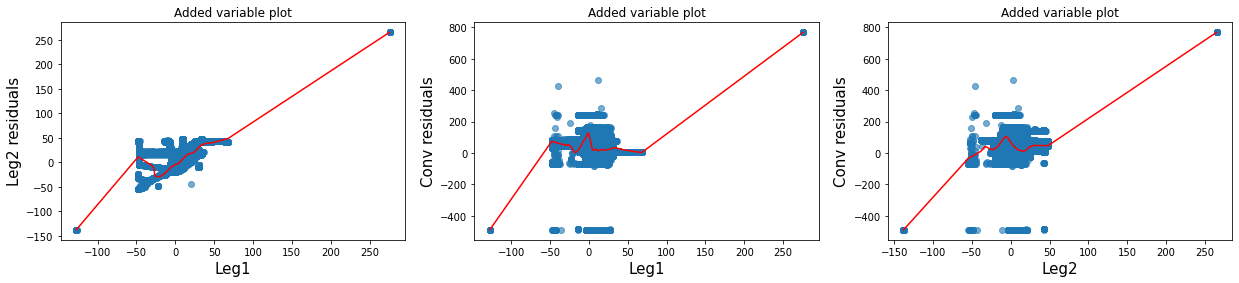

In [25]:
#@title
glm_plot(res_s11, res_s12, res_s13)
glm_plot(res_s21, res_s22, res_s23)
glm_plot(res_s31, res_s32, res_s33)
glm_plot(res_s41, res_s42, res_s43)

## Clustering

#### SAGES-1

Text(0, 0.5, 'Leg2')

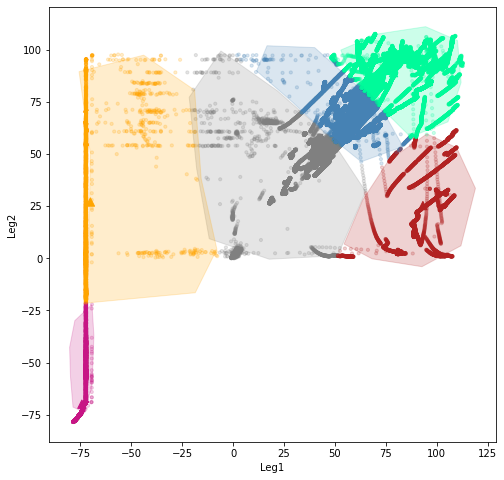

In [ ]:
#@title
from sklearn.cluster import KMeans
# k means
s11 = s1.copy()
kmeans = KMeans(n_clusters=6, random_state=0)
s11['cluster'] = kmeans.fit_predict(s11[['Leg1', 'Leg2']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
s11['cen_x'] = s11.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
s11['cen_y'] = s11.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})
# define and map colors
colors = ['steelblue', 'mediumvioletred', 'mediumspringgreen', 'orange', 'firebrick', 'gray']
s11['c'] = s11.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

from scipy import interpolate
from scipy.spatial import ConvexHull
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(s11.Leg1, s11.Leg2, c=s11.c, alpha = 0.2, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in s11.cluster.unique():
    # get the convex hull
    points = s11[s11.cluster == i][['Leg1', 'Leg2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 10)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
plt.xlabel('Leg1')
plt.ylabel('Leg2')

#### SAGES-2

In [44]:
#@title
from sklearn.cluster import KMeans
# k means
s21 = s2.copy()
kmeans = KMeans(n_clusters=6, random_state=0)
s21['cluster'] = kmeans.fit_predict(s21[['Leg1', 'Leg2']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
s21['cen_x'] = s21.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
s21['cen_y'] = s21.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})
# define and map colors
colors = ['steelblue', 'mediumvioletred', 'mediumspringgreen', 'orange', 'firebrick', 'gray']
s21['c'] = s21.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

(-80.0, 120.0)

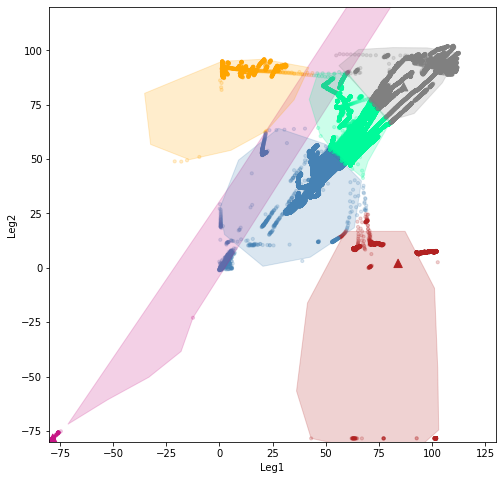

In [46]:
#@title
from scipy import interpolate
from scipy.spatial import ConvexHull
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(s21.Leg1, s21.Leg2, c=s21.c, alpha = 0.2, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in s21.cluster.unique():
    # get the convex hull
    points = s21[s21.cluster == i][['Leg1', 'Leg2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 10)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
plt.xlabel('Leg1')
plt.ylabel('Leg2')
plt.xlim(-80,130)
plt.ylim(-80,120)

#### SAGES-3

(-100.0, 150.0)

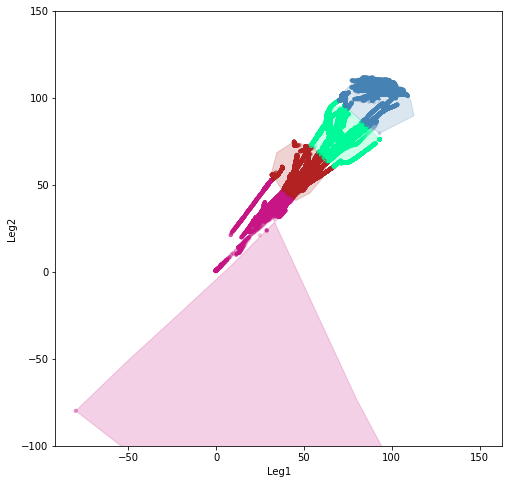

In [47]:
#@title
from sklearn.cluster import KMeans
# k means
s31 = s3.copy()
kmeans = KMeans(n_clusters=4, random_state=0)
s31['cluster'] = kmeans.fit_predict(s31[['Leg1', 'Leg2']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
s31['cen_x'] = s31.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
s31['cen_y'] = s31.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})
# define and map colors
colors = ['steelblue', 'mediumvioletred', 'mediumspringgreen', 'firebrick']
s31['c'] = s31.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

from scipy import interpolate
from scipy.spatial import ConvexHull
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(s31.Leg1, s31.Leg2, c=s31.c, alpha = 0.2, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in s31.cluster.unique():
    # get the convex hull
    points = s31[s31.cluster == i][['Leg1', 'Leg2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 10)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
plt.xlabel('Leg1')
plt.ylabel('Leg2')
plt.ylim(-100,150)

#### SAGES-4

(0.0, 120.0)

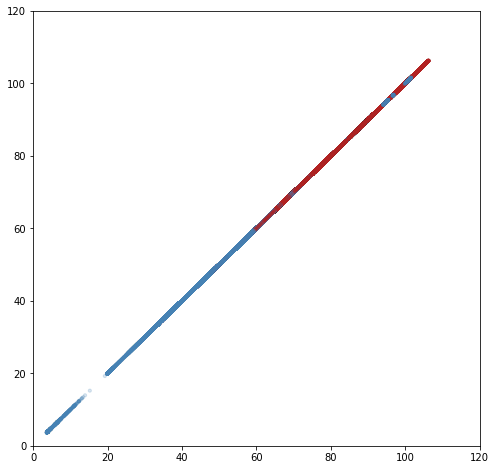

In [52]:
#@title
from sklearn.cluster import KMeans
import numpy as np
# k means
s41 = s4.copy()
kmeans = KMeans(n_clusters=4, random_state=0)
s41['cluster'] = kmeans.fit_predict(s41[['Leg1', 'Leg2']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
s41['cen_x'] = s41.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
s41['cen_y'] = s41.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})
# define and map colors
colors = ['steelblue', 'mediumvioletred', 'mediumspringgreen', 'firebrick']
s41['c'] = s41.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
plt.figure(figsize=(8,8))
plt.scatter(s41.Leg2, s41.Leg2, c=s41.c, alpha = 0.2, s=10)
plt.xlim(0, 120)
plt.ylim(0, 120)

## Variance Check

To observe the variance for SAGES - 1, 2, 3 and 4 <br>
go to https://public.tableau.com/app/profile/aman.mittal7968/viz/SAGESConvAnalysis/SAGES-2Variance <br>
Click on 'Download Workbook' to view full workbook on Tableau

In [13]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

df = pd.DataFrame({'r':[0,1,2], 'q':[4,5,6], 'p':[7,8,9]})
df

,r,q,p
0,0,4,7
1,1,5,8
2,2,6,9


In [34]:
l = ['r', 'q']
if all(l) in df.columns:
    print('a')

<ipython-input-12-b60e5ad521be>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  series.hist(ax=hist_ax)


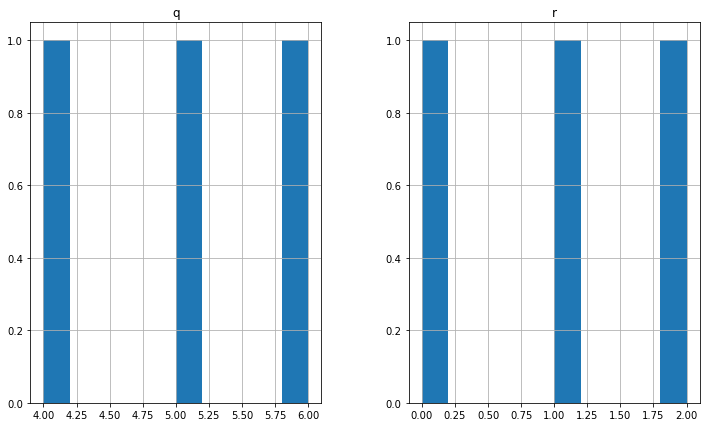

In [12]:
series = df[['q', 'r']]
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
# ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
# mean_ax = plt.subplot2grid(layout, (1, 1))

series.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

series = df[['r']]
mm = series.std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
E_train, E_test = train_test_split(df['q'])

In [39]:
E_train

0    4
2    6
Name: q, dtype: int64